# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [182]:
import pandas as pd

import numpy as np

# Importando a biblioteca warnings para ignorar avisos durante a execução do código
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler

In [183]:
# Lendo o arquivo
df = pd.read_excel('customer_supermarket.xlsx')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,2020-09-04,849,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,2022-03-08,299,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,2021-08-21,498,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,2022-02-10,325,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,2022-01-19,347,94,...,5,0,0,0,0,0,0,3,11,0


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Days_Registered      2240 non-null   int64         
 9   Recency              2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

### Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

In [185]:
# Verificar dados ausentes
print("Dados ausentes por coluna:")
print(df.isnull().sum())

# Dropar dados ausentes
df.dropna(inplace=True)
df.isnull().sum()

Dados ausentes por coluna:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Days_Registered         0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Days_Registered        0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [186]:
numerical_df = df.select_dtypes(include='number')

In [187]:
# Criar uma instância do StandardScaler
scaler = RobustScaler()

alpha = 0.02  # Definir o nível de significância desejado
iqr_multiplier = 1.5
zscore_threshold = 3 

outliers_count = {}

for column in numerical_df.columns:
    # Contagem de outliers usando o método do IQR
    q1 = numerical_df[column].quantile(0.25)
    q3 = numerical_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_threshold_iqr = q1 - iqr_multiplier * iqr
    upper_threshold_iqr = q3 + iqr_multiplier * iqr
    outliers_iqr = numerical_df[(numerical_df[column] < lower_threshold_iqr) | (numerical_df[column] > upper_threshold_iqr)]
    
    # Contagem de outliers usando o método do Z-score
    mean = numerical_df[column].mean()
    std = numerical_df[column].std()
    lower_threshold_zscore = mean - zscore_threshold * std
    upper_threshold_zscore = mean + zscore_threshold * std
    outliers_zscore = numerical_df[(numerical_df[column] < lower_threshold_zscore) | (numerical_df[column] > upper_threshold_zscore)]
    

    # Padronizar os dados
    dados_padronizados = scaler.fit_transform(numerical_df)

    # Criar um novo DataFrame com os dados padronizados
    df_padronizado = pd.DataFrame(dados_padronizados, columns=numerical_df.columns)

    # Contagem de outliers usando o método Isolation Forest
    isolation_forest = IsolationForest(contamination=alpha)
    isolation_forest.fit(df_padronizado[[column]])
    outliers_isolation_forest = isolation_forest.predict(df_padronizado[[column]])
    outliers_isolation_forest = numerical_df[outliers_isolation_forest == -1]

    # Apply DBSCAN to cluster the data and find outliers
    dbscan = DBSCAN(eps=0.2, min_samples=5)
    dbscan.fit(df_padronizado[[column]])
    outliers_DBSCAN = dbscan.labels_
    outliers_DBSCAN = numerical_df[outliers_DBSCAN == -1]
    
    outliers_count[column] = {'IQR': outliers_iqr.shape[0], 'Z-score': outliers_zscore.shape[0],
                               'Isolation Forest': outliers_isolation_forest.shape[0], 'DBSCAN': outliers_DBSCAN.shape[0]}

outliers_df = pd.DataFrame(outliers_count).transpose()
print(outliers_df)

                     IQR  Z-score  Isolation Forest  DBSCAN
ID                     0        0                45       0
Year_Birth             3        3                41       3
Income                 8        8                45       2
Kidhome                0        0                 0       0
Teenhome               0        0                 0       0
Days_Registered        0        0                45       0
Recency                0        0                45       0
MntWines              35       15                45       0
MntFruits            246       64                41       0
MntMeatProducts      174       39                45       4
MntFishProducts      222       58                43       0
MntSweetProducts     246       61                42       1
MntGoldProds         205       46                43       3
NumDealsPurchases     84       31                45       6
NumWebPurchases        3        3                 3       3
NumCatalogPurchases   23        4       

In [188]:
from scipy.stats import zscore

# Selecionar apenas as colunas numéricas do dataframe
df_numerico = df.select_dtypes(include=np.number)

# Calcular os Z-scores para as colunas numéricas
z_scores = zscore(df_numerico)

# Filtrar as linhas com Z-score acima de 3 em qualquer coluna numérica
df_no_outliers = df[~((z_scores > 3).any(axis=1))]

In [190]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1576 non-null   int64         
 1   Year_Birth           1576 non-null   int64         
 2   Education            1576 non-null   object        
 3   Marital_Status       1576 non-null   object        
 4   Income               1576 non-null   float64       
 5   Kidhome              1576 non-null   int64         
 6   Teenhome             1576 non-null   int64         
 7   Dt_Customer          1576 non-null   datetime64[ns]
 8   Days_Registered      1576 non-null   int64         
 9   Recency              1576 non-null   int64         
 10  MntWines             1576 non-null   int64         
 11  MntFruits            1576 non-null   int64         
 12  MntMeatProducts      1576 non-null   int64         
 13  MntFishProducts      1576 non-nul

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [191]:
df_no_outliers['MntTotal'] = df_no_outliers[['MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum(axis=1)

### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [192]:
df_selected = df_no_outliers.loc[:, ['Recency', 'Days_Registered', 'MntTotal', 'Income']]

### Atividade 5: Padronize os dados.

In [193]:
scaler = StandardScaler()
df_selected_padronizado = scaler.fit_transform(df_selected)

### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

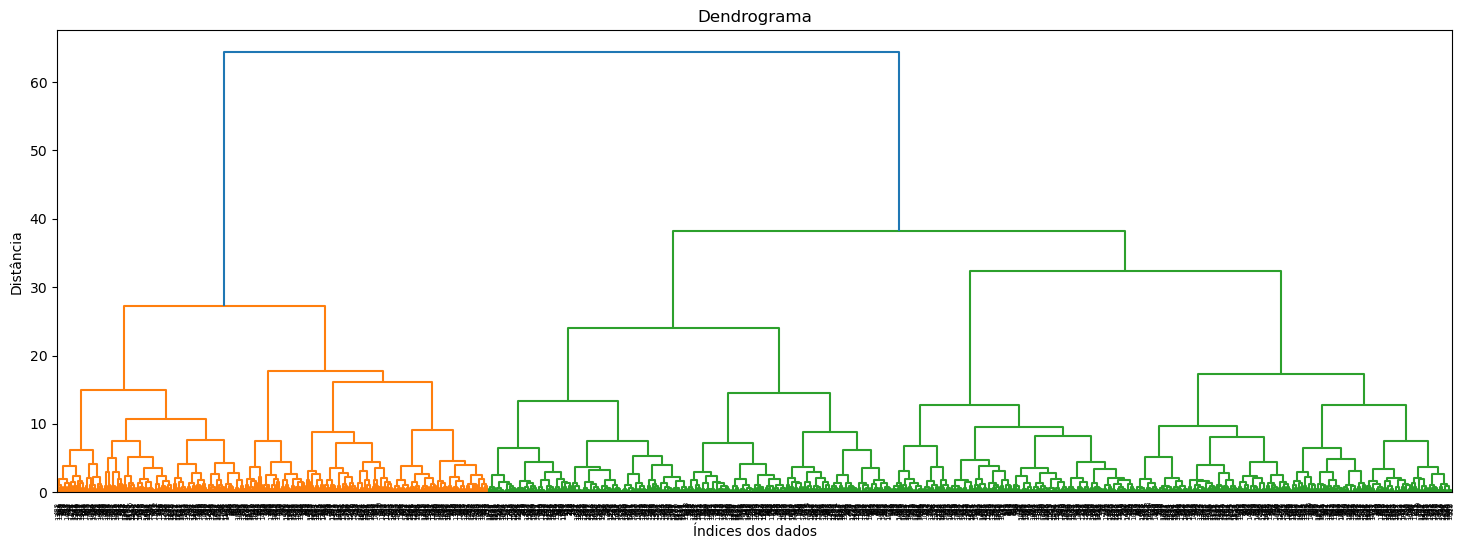

In [194]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Realizar o agrupamento hierárquico
Z = linkage(df_selected_padronizado, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(18, 6))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índices dos dados')
plt.ylabel('Distância')
plt.show()


### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [195]:
from scipy.cluster.hierarchy import fcluster

# Definir o número de grupos
num_grupos = 4

# Obter os rótulos de grupos com base no número de grupos escolhido
rotulos_grupos = fcluster(Z, num_grupos, criterion='maxclust')

# Adicionar a coluna 'grupos' ao dataframe original
df_selected['grupos'] = rotulos_grupos


### Atividade 8: Crie Gráficos para visualizar os Grupos.

#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

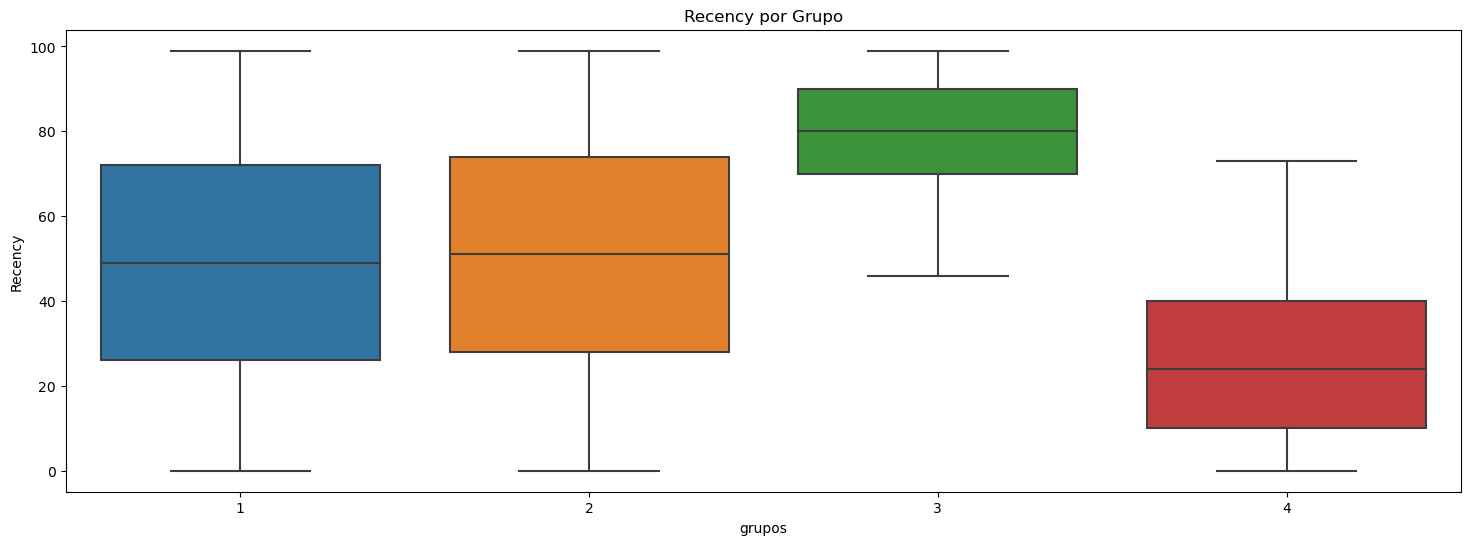

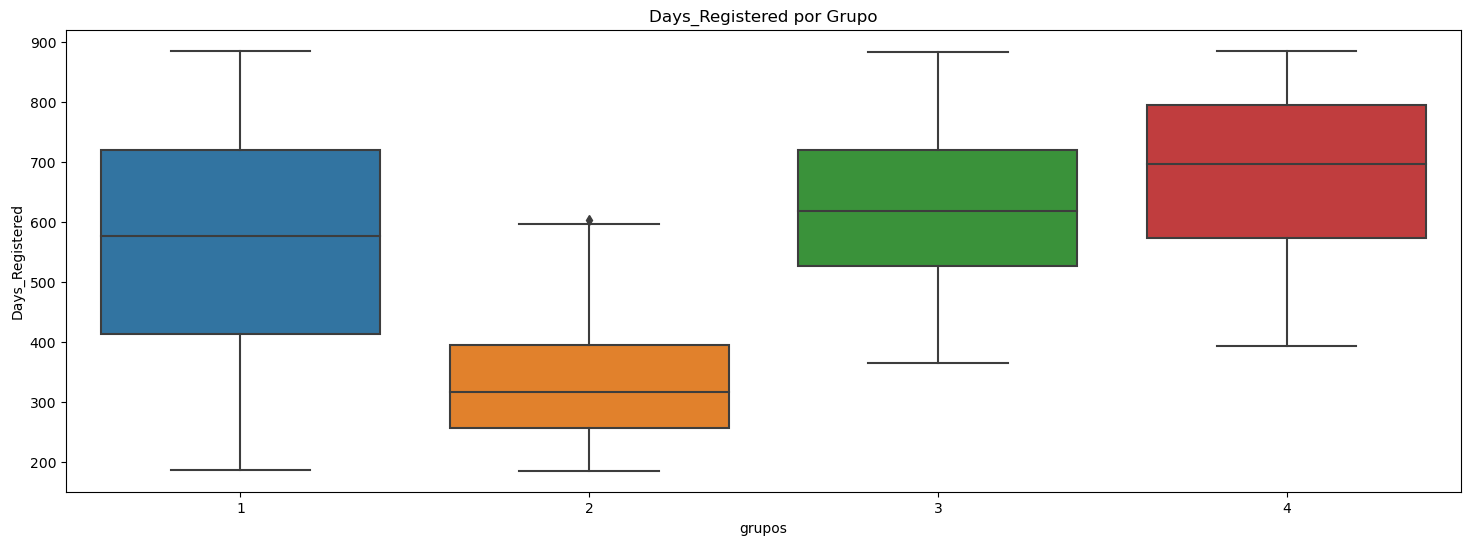

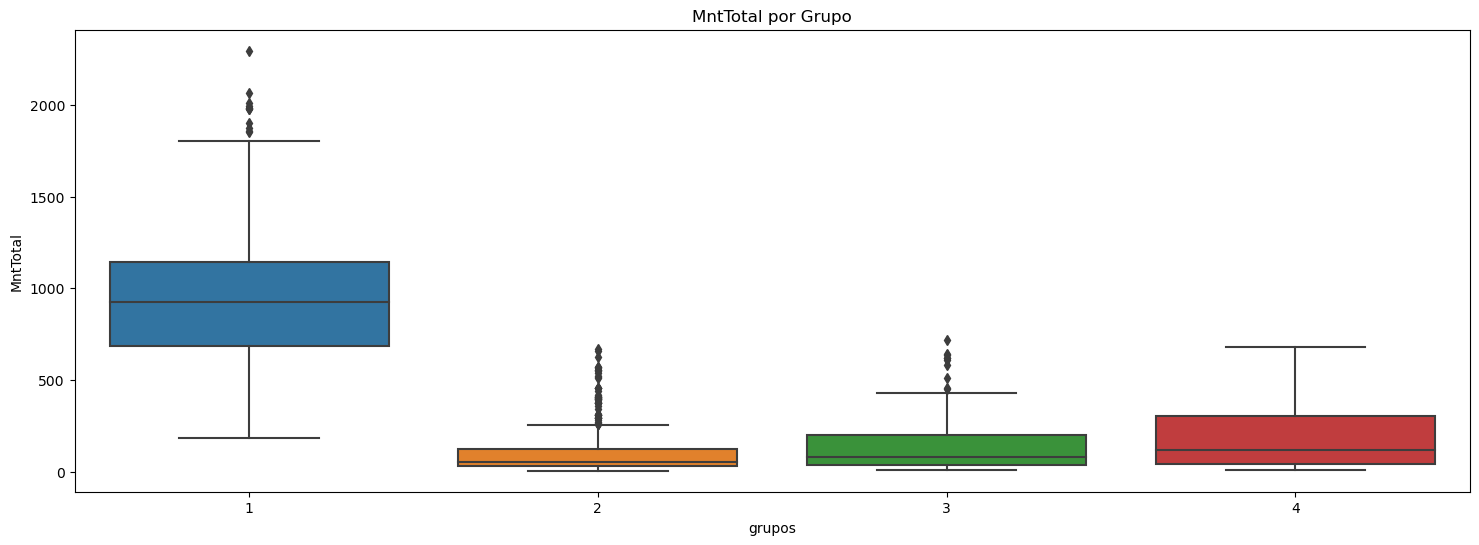

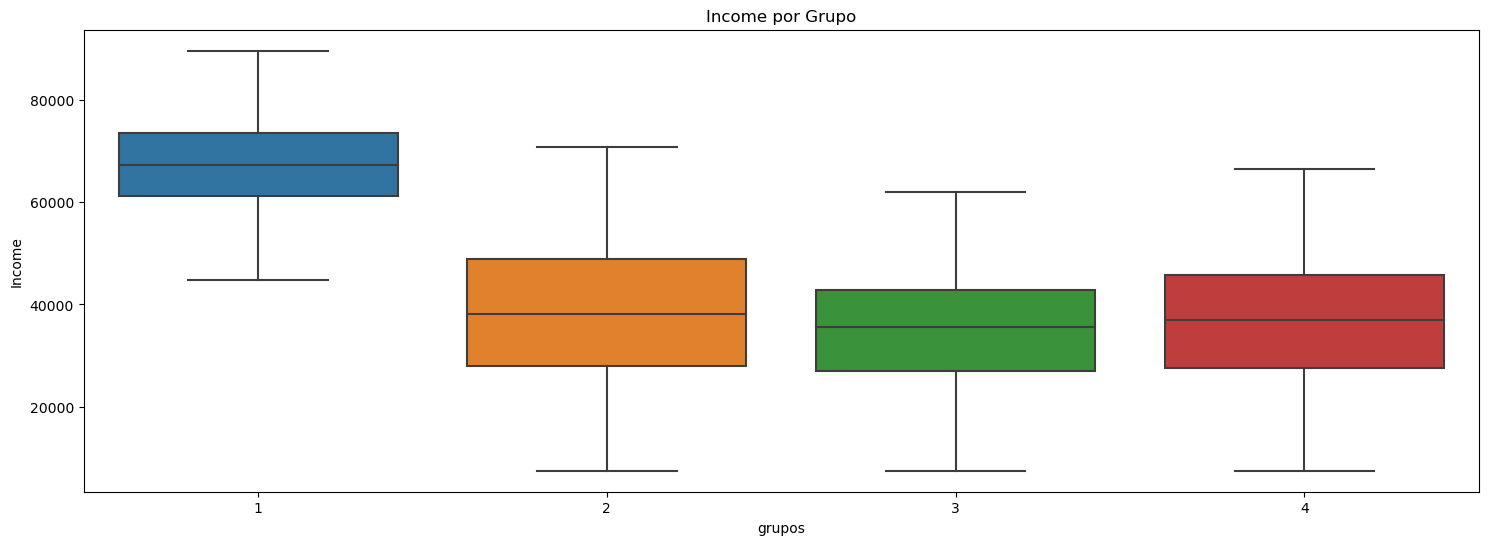

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar boxplots para cada variável em relação aos grupos
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Recency')
plt.title('Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Days_Registered')
plt.title('Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='MntTotal')
plt.title('MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Income')
plt.title('Income por Grupo')
plt.show()

#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

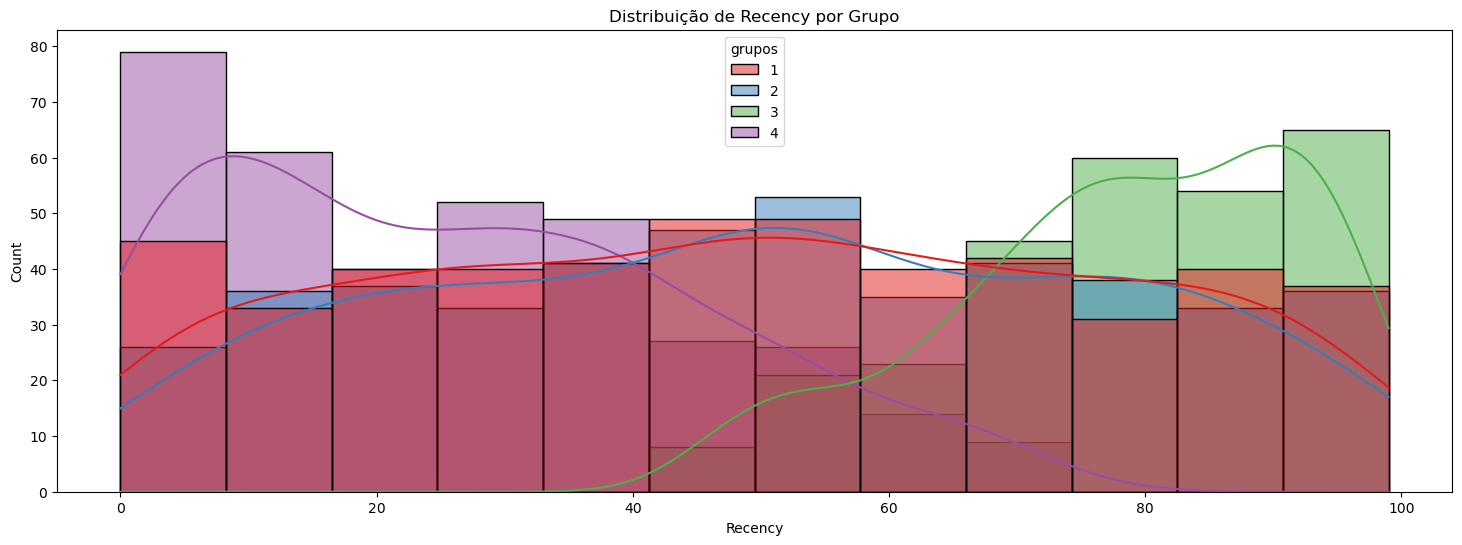

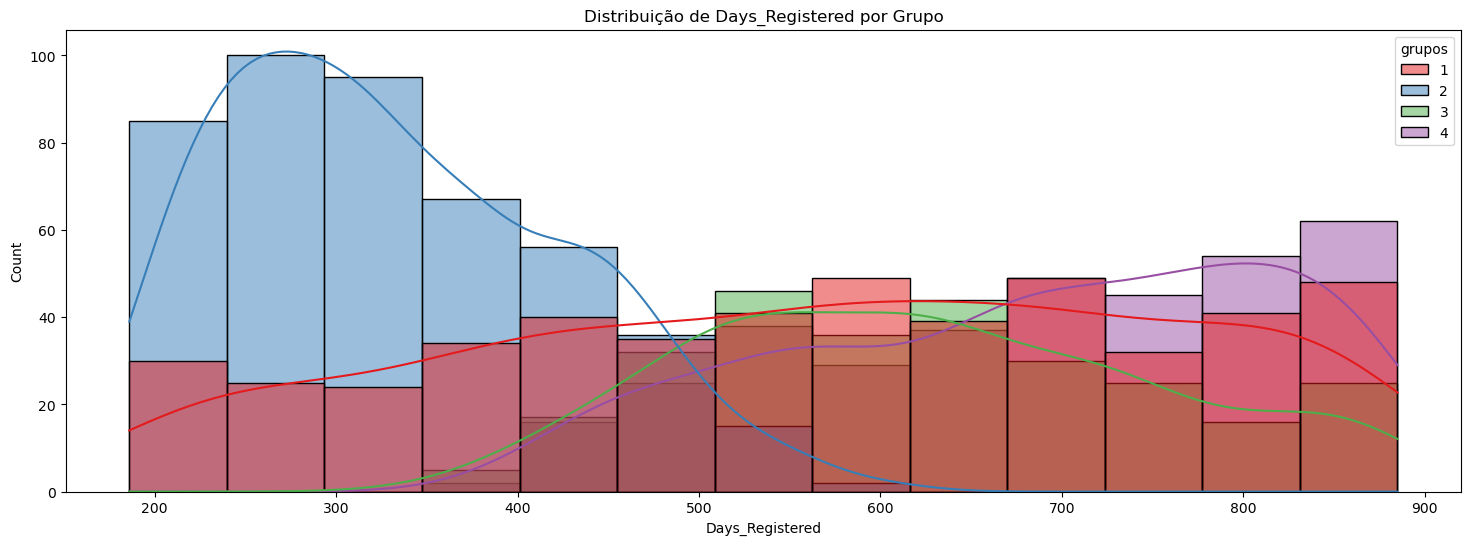

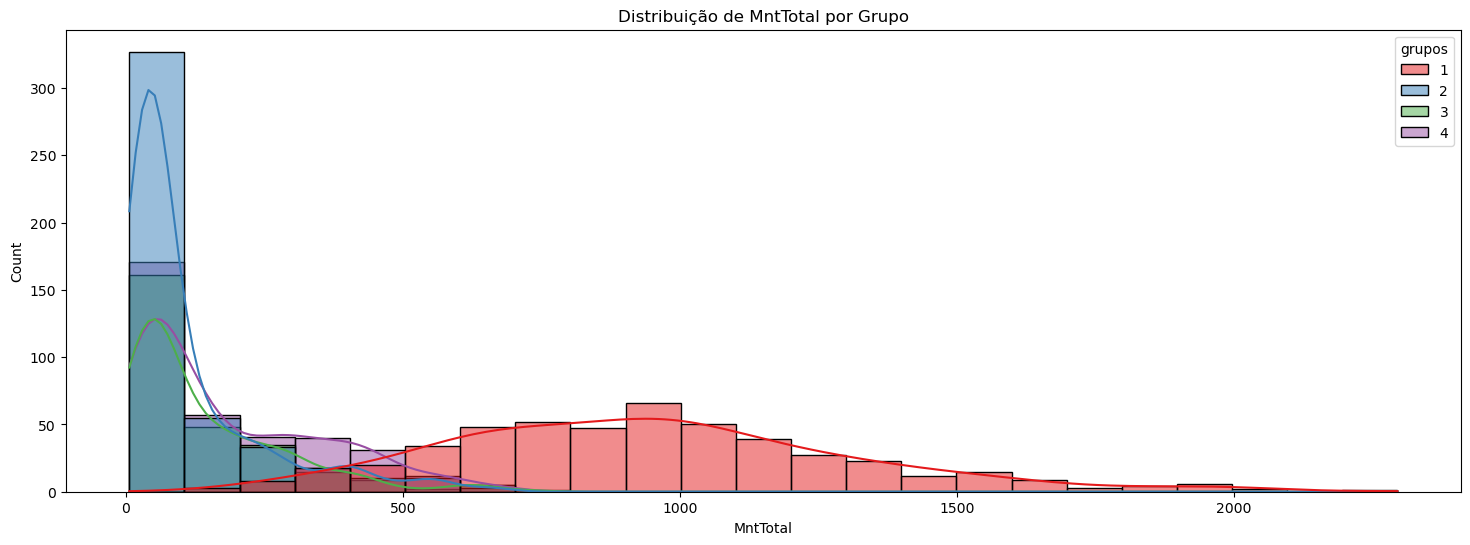

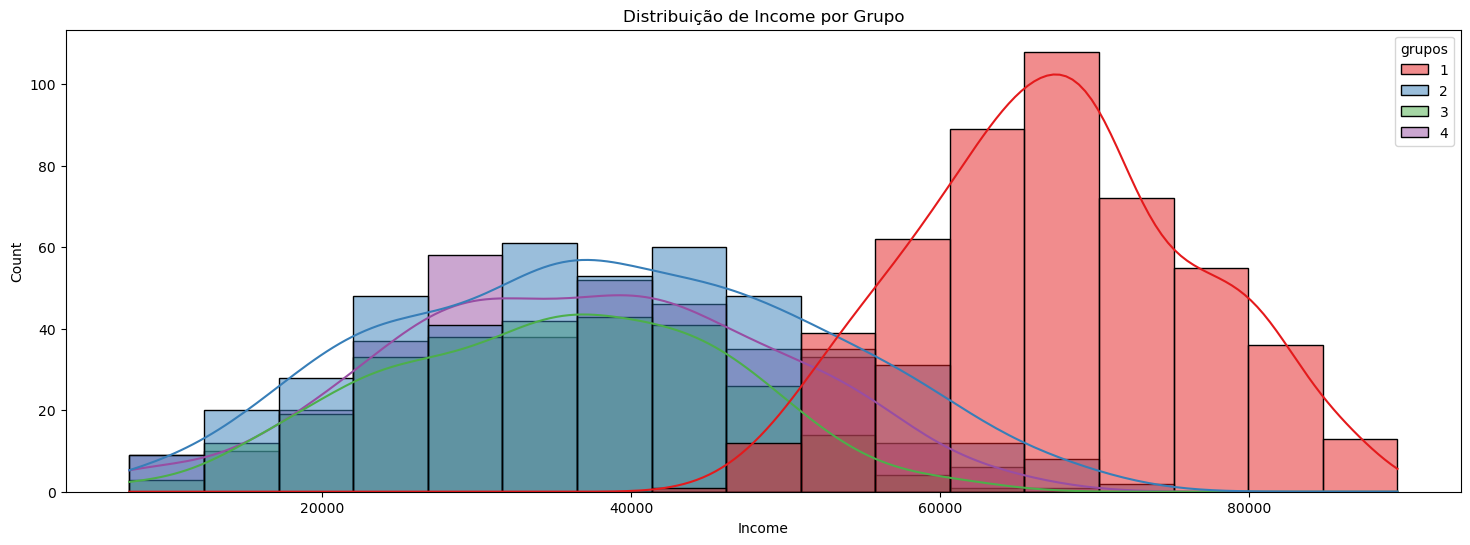

In [197]:
# Criar histogramas para cada variável em relação aos grupos
plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Recency', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Days_Registered', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='MntTotal', hue='grupos', kde=True , palette='Set1')
plt.title('Distribuição de MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Income', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Income por Grupo')
plt.show()


### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

Descrição dos Grupos:

* O grupo 1 é composto por pessoas que [...].

* O grupo 2 é composto por pessoas que [...].

* O grupo (n) é composto por pessoas que [...].

Persona 1: Comprador Leal
- Descrição: O Comprador Leal é um cliente fiel que pertence ao Grupo 1. Ele realiza compras regularmente, mantendo um intervalo médio de 48.99 dias entre as compras. Está registrado há aproximadamente 566.30 dias e tem um valor total de compras elevado. Sua renda anual é alta.
- Comportamento: O Comprador Leal valoriza a qualidade dos produtos e busca marcas de confiança. Ele é leal à marca e está disposto a pagar mais por produtos premium. Além disso, procura uma experiência de compra personalizada e exclusiva.
- Objetivos: O Comprador Leal busca produtos de alta qualidade, promoções especiais e ofertas exclusivas. Ele valoriza a conveniência e está aberto a receber recomendações e informações personalizadas.

Persona 2: Cliente Ocasional
- Descrição: O Cliente Ocasional pertence ao Grupo 2. Ele faz compras em intervalos médios de 50.43 dias e está registrado há cerca de 331.14 dias. O valor total de suas compras é relativamente baixo e sua renda anual é moderada.
- Comportamento: O Cliente Ocasional realiza compras de forma esporádica, aproveitando promoções e descontos. Ele busca produtos com boa relação custo-benefício, está aberto a experimentar novos itens e procura por produtos acessíveis.
- Objetivos: O Cliente Ocasional busca produtos de qualidade a preços acessíveis. Valoriza promoções, descontos e busca produtos que se encaixem em seu orçamento.

Persona 3: Cliente Sazonal
- Descrição: O Cliente Sazonal faz parte do Grupo 3. Ele faz compras em intervalos médios de 78.44 dias e está registrado há aproximadamente 625.99 dias. O valor total de suas compras é relativamente baixo e sua renda anual é moderada.
- Comportamento: O Cliente Sazonal realiza compras em períodos específicos, como feriados ou estações do ano. Ele busca produtos sazonais, ofertas especiais e presentes para ocasiões específicas.
- Objetivos: O Cliente Sazonal busca produtos temáticos, promoções sazonais e presentes para ocasiões específicas. Valoriza a variedade de produtos disponíveis durante esses períodos.

Persona 4: Cliente Frequente
- Descrição: O Cliente Frequente pertence ao Grupo 4. Ele faz compras com frequência, mantendo um intervalo médio de 26.11 dias entre as compras. Está registrado há cerca de 686.84 dias e tem um valor total de compras relativamente alto. Sua renda anual é moderada.
- Comportamento: O Cliente Frequente valoriza a conveniência e a variedade de produtos. Ele está aberto a experimentar novos itens e busca por promoções exclusivas. Sua frequência de compra indica um interesse constante em explorar novidades e manter-se atualizado.
- Objetivos: O Cliente Frequente busca uma experiência de compra sem complicações, com acesso a uma ampla gama de produtos. Valoriza descontos especiais, promoções e ofertas personalizadas para sua frequência de compra.

### Para refletir: 


#### Quais outras variáveis poderíamos combinar ou processar para obter análises mais precisas?

Exemplo: e se comparássemos o valor gasto com a faixa de salário para entender esses valores percentualmente?

In [198]:
# Criar nova coluna "Gasto_Renda"
df_selected['Gasto_Renda'] = df_selected['MntTotal'] / df_selected['Income']

In [199]:
scaler = StandardScaler()
df_selected_padronizado = scaler.fit_transform(df_selected)

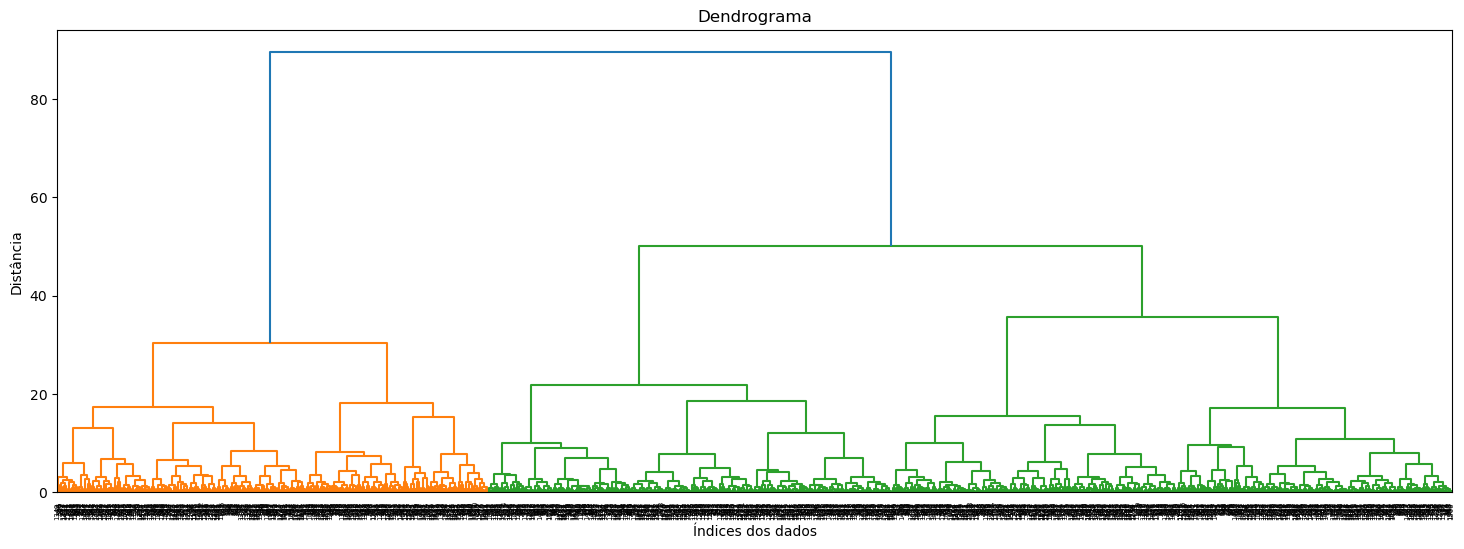

In [200]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Realizar o agrupamento hierárquico
Z = linkage(df_selected_padronizado, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(18, 6))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índices dos dados')
plt.ylabel('Distância')
plt.show()

In [201]:
from scipy.cluster.hierarchy import fcluster

# Definir o número de grupos
num_grupos = 3

# Obter os rótulos de grupos com base no número de grupos escolhido
rotulos_grupos = fcluster(Z, num_grupos, criterion='maxclust')

# Adicionar a coluna 'grupos' ao dataframe original
df_selected['grupos'] = rotulos_grupos

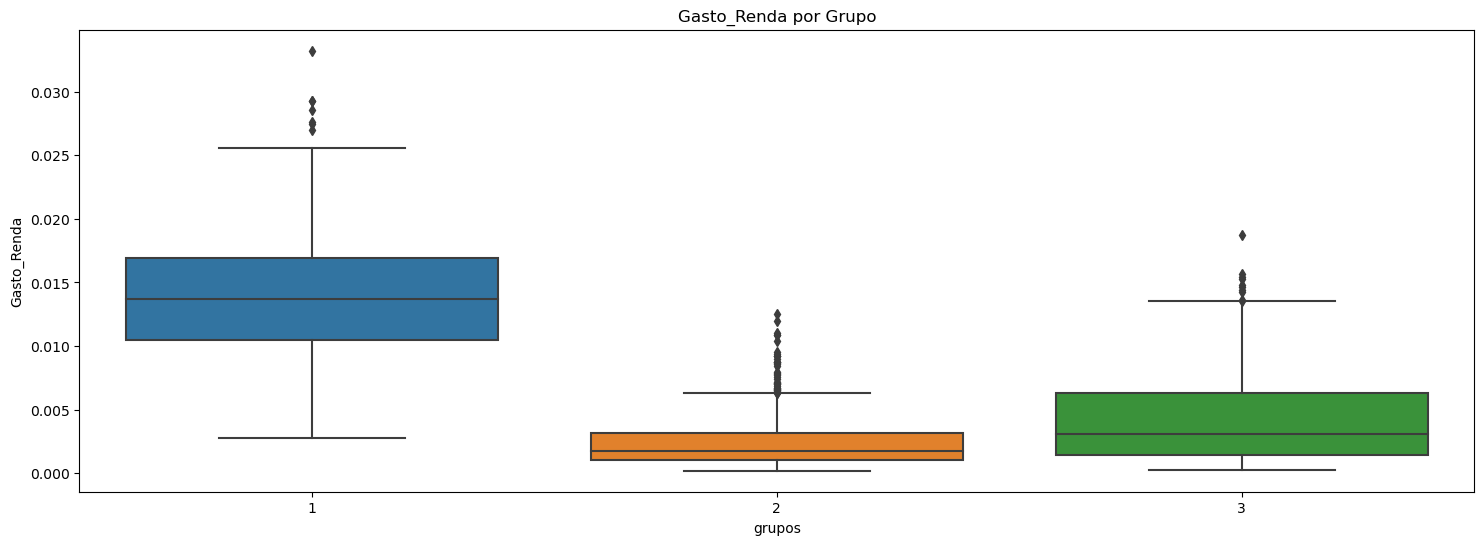

In [202]:
# Criar boxplots para cada variável em relação aos grupos
'''plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Recency')
plt.title('Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Days_Registered')
plt.title('Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='MntTotal')
plt.title('MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Income')
plt.title('Income por Grupo')
plt.show()'''

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Gasto_Renda')
plt.title('Gasto_Renda por Grupo')
plt.show()

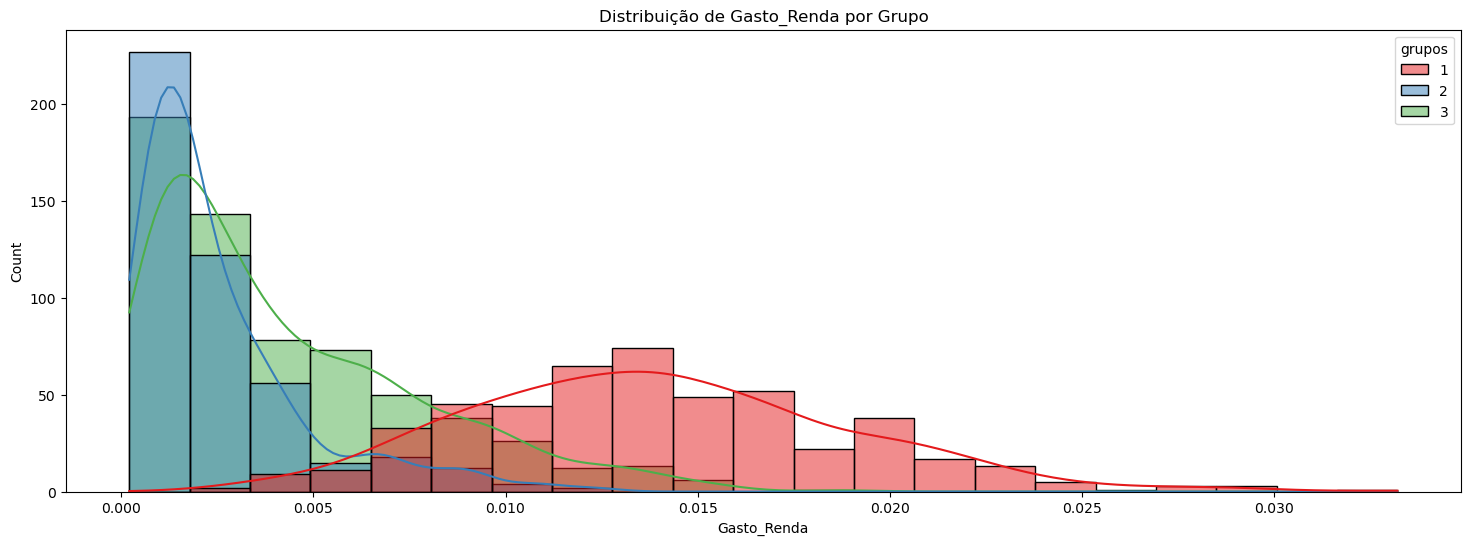

In [203]:
# Criar histogramas para cada variável em relação aos grupos
'''plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Recency', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Days_Registered', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='MntTotal', hue='grupos', kde=True , palette='Set1')
plt.title('Distribuição de MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Income', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Income por Grupo')
plt.show()'''

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Gasto_Renda', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Gasto_Renda por Grupo')
plt.show()

Persona 1: Cliente Leal

- Descrição: O Cliente Leal é caracterizado por ser um cliente fiel e de alto valor para a empresa. Ele realizou compras recentemente (baixo valor de Recency), está cadastrado há mais tempo (alto número de Days_Registered) e gasta uma quantia considerável em todas as categorias de produtos (alto valor de MntTotal). Além disso, possui uma renda anual alta (Income).
- Nível de escolaridade: Graduação (predominante).
- Comportamento: Realiza compras com frequência, possui um histórico de relacionamento longo com a empresa e tem um bom poder aquisitivo.
- Objetivos: Busca produtos de alta qualidade e está aberto a ofertas e promoções exclusivas.
Desafios: Manter a fidelidade do Cliente Leal, garantindo que ele se sinta valorizado e receba um atendimento personalizado.

Persona 2: Cliente Regular

- Descrição: O Cliente Regular é caracterizado por ter um valor moderado de Recency, indicando que realizou compras relativamente recentemente. O número de Days_Registered é variado, mas em geral, possui um registro de médio a longo prazo. O valor total de gastos (MntTotal) é mais baixo em comparação com o grupo de Clientes Leais, assim como a renda anual (Income).
- Nível de escolaridade: Master (predominante).
- Comportamento: Realiza compras com menor frequência e tem um poder aquisitivo moderado.
- Objetivos: Busca produtos e promoções que ofereçam um bom custo-benefício.
- Desafios: Estimular o Cliente Regular a aumentar sua frequência de compras e a experimentar outros produtos da empresa.

Persona 3: Cliente Ocasional

- Descrição: O Cliente Ocasional é caracterizado por ter um valor moderado de Recency, indicando compras relativamente recentes. O número de Days_Registered é variado, o que significa que ele pode ser um cliente recente ou com um histórico de relacionamento mais longo. O valor total de gastos (MntTotal) é baixo, sugerindo menor envolvimento nas categorias de produtos, assim como a renda anual (Income).
- Nível de escolaridade: Graduação (predominante).
- Comportamento: Realiza compras esporádicas e tem um poder aquisitivo mais limitado.
- Objetivos: Busca ofertas e promoções que sejam acessíveis e adequadas às suas necessidades.
- Desafios: Estimular o Cliente Ocasional a se tornar mais engajado, oferecendo produtos e experiências personalizadas.

#### Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot EncodingUma categorica


In [204]:
df_no_outliers['Education'].value_counts()

Graduation    782
PhD           338
Master        267
2n Cycle      142
Basic          47
Name: Education, dtype: int64

In [205]:
# Criar as variáveis dummy para a coluna 'Education'
education_dummies = pd.get_dummies(df_no_outliers['Education'], prefix='')

# Concatenar as variáveis dummy ao dataframe df_selected
df_selected = pd.concat([df_selected, education_dummies], axis=1)


In [206]:
df_selected.head()

,Recency,Days_Registered,MntTotal,Income,grupos,Gasto_Renda,_2n Cycle,_Basic,_Graduation,_Master,_PhD
0,58,849,1445,58138.0,1,0.024855,0,0,1,0,0
1,38,299,25,46344.0,2,0.000539,0,0,1,0,0
2,26,498,665,71613.0,1,0.009286,0,0,1,0,0
3,26,325,43,26646.0,2,0.001614,0,0,1,0,0
4,94,347,376,58293.0,2,0.006450,0,0,0,0,1


In [207]:
scaler = StandardScaler()
df_selected_padronizado = scaler.fit_transform(df_selected)

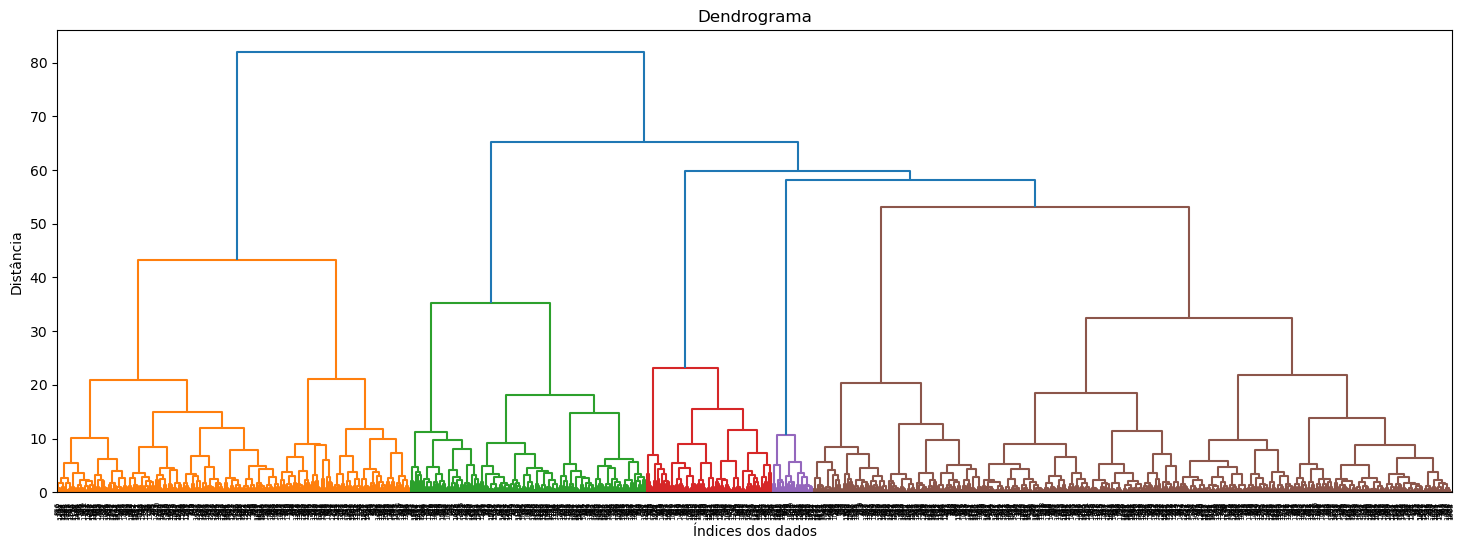

In [208]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Realizar o agrupamento hierárquico
Z = linkage(df_selected_padronizado, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(18, 6))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índices dos dados')
plt.ylabel('Distância')
plt.show()

In [209]:
from scipy.cluster.hierarchy import fcluster

# Definir o número de grupos
num_grupos = 6

# Obter os rótulos de grupos com base no número de grupos escolhido
rotulos_grupos = fcluster(Z, num_grupos, criterion='maxclust')

# Adicionar a coluna 'grupos' ao dataframe original
df_selected['grupos'] = rotulos_grupos

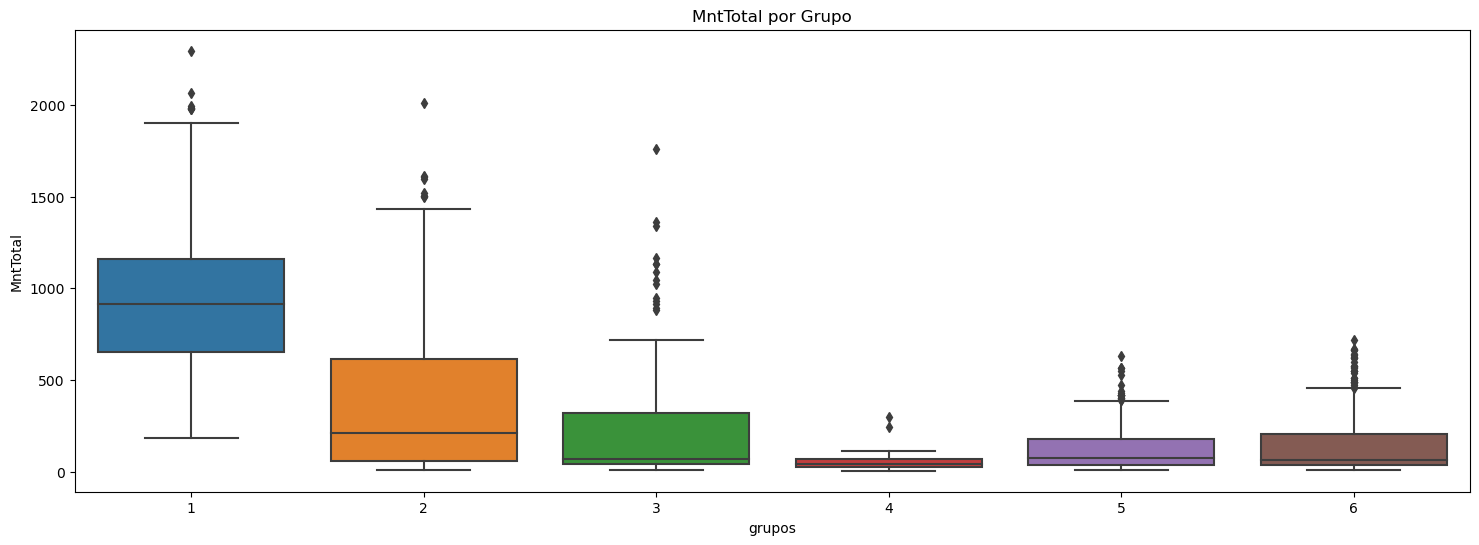

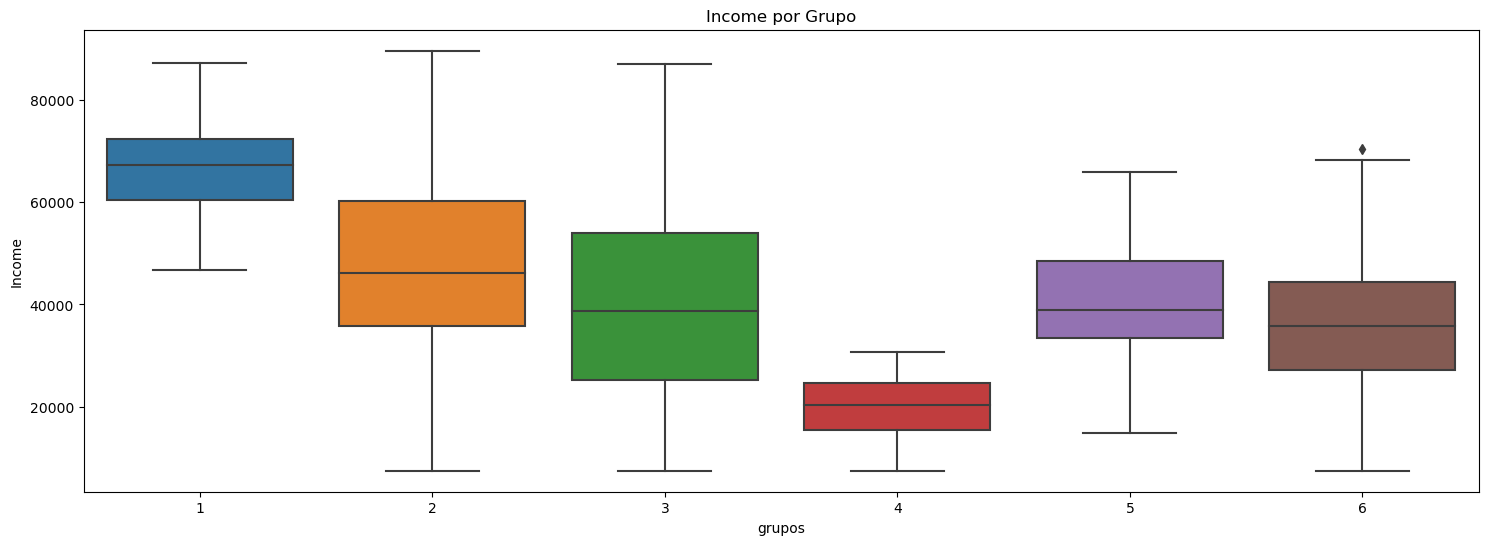

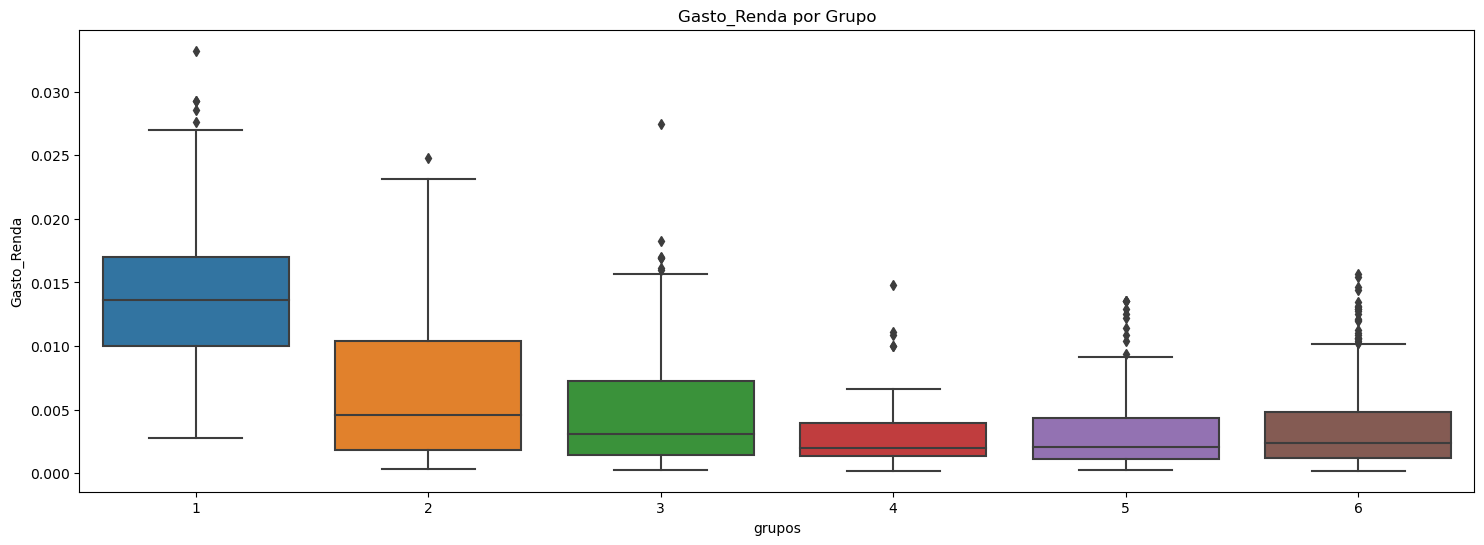

In [210]:
# Criar boxplots para cada variável em relação aos grupos
'''plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Recency')
plt.title('Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Days_Registered')
plt.title('Days_Registered por Grupo')
plt.show()'''

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='MntTotal')
plt.title('MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Income')
plt.title('Income por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(data=df_selected, x='grupos', y='Gasto_Renda')
plt.title('Gasto_Renda por Grupo')
plt.show()

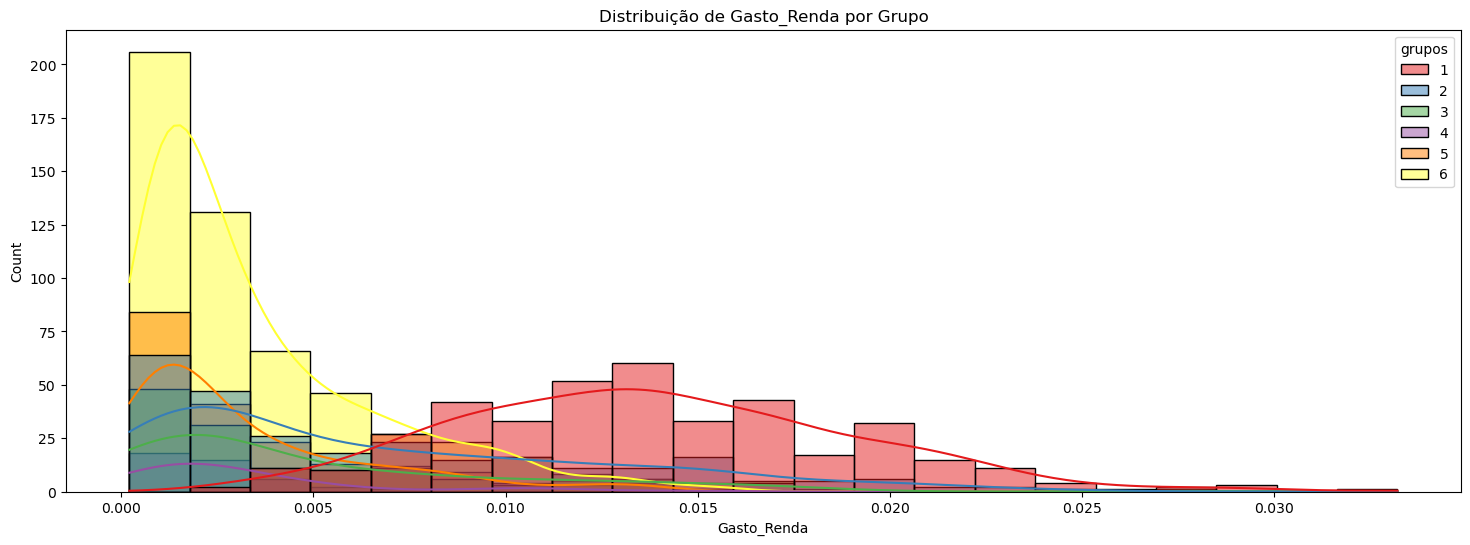

In [211]:
# Criar histogramas para cada variável em relação aos grupos
'''plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Recency', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Recency por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Days_Registered', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Days_Registered por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='MntTotal', hue='grupos', kde=True , palette='Set1')
plt.title('Distribuição de MntTotal por Grupo')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Income', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Income por Grupo')
plt.show()'''

plt.figure(figsize=(18, 6))
sns.histplot(data=df_selected, x='Gasto_Renda', hue='grupos', kde=True, palette='Set1')
plt.title('Distribuição de Gasto_Renda por Grupo')
plt.show()

Persona 1: Cliente Fiel

- Descrição: O Cliente Fiel pertence ao Grupo 1, caracterizado por ter um alto valor de Recency, indicando que realizou compras recentemente. O número de Days_Registered é relativamente alto, sugerindo um relacionamento de longo prazo com a empresa. O valor total de gastos (MntTotal) é consideravelmente alto, assim como a renda anual (Income).
- Nível de escolaridade: Graduação.
- Comportamento: Realiza compras frequentes e tem um poder aquisitivo elevado.
- Objetivos: Busca produtos de alta qualidade e está disposto a pagar por produtos premium.
- Desafios: Manter a satisfação do Cliente Fiel, garantindo que ele receba um atendimento personalizado e ofertas exclusivas.

Persona 2: Cliente Econômico

- Descrição: O Cliente Econômico pertence ao Grupo 2, caracterizado por ter um valor moderado de Recency, indicando compras relativamente recentes. O número de Days_Registered é variado, mas em geral, possui um registro de médio a longo prazo. O valor total de gastos (MntTotal) é baixo em comparação com outros grupos, assim como a renda anual (Income).
- Nível de escolaridade: Ensino Médio.
- Comportamento: Realiza compras com menor frequência e tem um poder aquisitivo mais limitado.
- Objetivos: Busca produtos e promoções com preços acessíveis e boa relação custo-benefício.
- Desafios: Estimular o Cliente Econômico a aumentar suas compras e fidelidade, oferecendo opções acessíveis e vantagens exclusivas.

Persona 3: Cliente em Transição

- Descrição: O Cliente em Transição pertence ao Grupo 3, caracterizado por ter um valor moderado de Recency, indicando compras relativamente recentes. O número de Days_Registered é variado, sugerindo clientes recentes ou com histórico de relacionamento mais longo. O valor total de gastos (MntTotal) é moderado, assim como a renda anual (Income).
- Nível de escolaridade: Graduação.
- Comportamento: Realiza compras esporádicas e tem um poder aquisitivo médio.
- Objetivos: Busca ofertas e promoções que sejam adequadas ao seu orçamento e às suas necessidades.
- Desafios: Estimular o Cliente em Transição a se engajar mais com a marca e aumentar sua fidelidade, oferecendo uma experiência personalizada e comunicação relevante.

Persona 4: Cliente em Busca de Qualidade

- Descrição: O Cliente em Busca de Qualidade pertence ao Grupo 4, caracterizado por ter um valor moderado de Recency, indicando compras relativamente recentes. O número de Days_Registered é variado, sugerindo clientes recentes ou com histórico de relacionamento mais longo. O valor total de gastos (MntTotal) é considerável, assim como a renda anual (Income).
- Nível de escolaridade: Doutorado.
- Comportamento: Realiza compras esporádicas, mas busca produtos de alta qualidade e está disposto a pagar por eles.
- Objetivos: Busca produtos exclusivos, inovadores e de alto valor agregado.
- Desafios: Manter o Cliente em Busca de Qualidade satisfeito, oferecendo produtos exclusivos, excelente atendimento e experiências diferenciadas.

Persona 5: Cliente de Baixa Renda

- Descrição: O Cliente de Baixa Renda pertence ao Grupo 5, caracterizado por ter um valor moderado de Recency, indicando compras relativamente recentes. O número de Days_Registered é variado, sugerindo clientes recentes ou com histórico de relacionamento mais longo. O valor total de gastos (MntTotal) é baixo, assim como a renda anual (Income).
Nível de escolaridade: Ensino Fundamental.
- Comportamento: Realiza compras esporádicas e tem um poder aquisitivo limitado.
- Objetivos: Busca produtos e promoções com preços extremamente acessíveis.
- Desafios: Oferecer produtos e serviços que sejam adequados às restrições orçamentárias do Cliente de Baixa Renda, criando opções de parcelamento e descontos especiais.

Persona 6: Cliente em Exploração

- Descrição: O Cliente em Exploração pertence ao Grupo 6, caracterizado por ter um valor moderado de Recency, indicando compras relativamente recentes. O número de Days_Registered é variado, sugerindo clientes recentes ou com histórico de relacionamento mais longo. O valor total de gastos (MntTotal) é moderado, assim como a renda anual (Income).
- Nível de escolaridade: Ensino Médio.
- Comportamento: Realiza compras esporádicas e está explorando diferentes opções no mercado.
- Objetivos: Busca por novidades, ofertas e promoções atrativas.
- Desafios: Estimular o Cliente em Exploração a se envolver mais com a marca, oferecendo uma variedade de produtos, comunicação personalizada e incentivos para sua fidelidade.